11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 366,618 (1.40 MB)

 Trainable params: 366,618 (1.40 MB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8943 - loss: 0.3484 - val_accuracy: 0.9750 - val_loss: 0.0861
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9752 - loss: 0.0824 - val_accuracy: 0.9757 - val_loss: 0.0841
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9818 - loss: 0.0563 - val_accuracy: 0.9802 - val_loss: 0.0755
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9879 - loss: 0.0371 - val_accuracy: 0.9815 - val_loss: 0.0689
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9892 - loss: 0.0317 - val_accuracy: 0.9777 - val_loss: 0.0968
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9925 - loss: 0.0218 - val_accuracy: 0.9828 - val_loss: 0.0727
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9773 - val_loss: 0.0952
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - acc

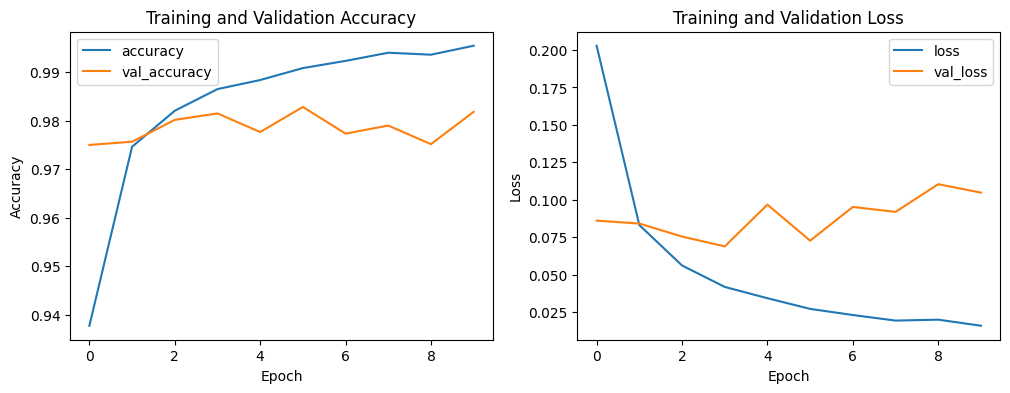

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data: Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 2. Build the Neural Network Classification Architecture
model = keras.Sequential([
    # Input Layer: Flattens the 28x28 image
    layers.Flatten(input_shape=(28, 28)),

    # Hidden Dense Layer 1: 400 neurons and ReLU activation
    layers.Dense(400, activation='relu'),

    # Hidden Dense Layer 2: 128 neurons and ReLU activation
    layers.Dense(128, activation='relu'),

    # Output Dense Layer: 10 neurons and 'Softmax' activation
    layers.Dense(10, activation='softmax')
])

# 3. Compile the model
# For multi-class classification where labels are integers (0-9), use sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary to see the layers and parameters
model.summary()

# Optional: Train the model (you can adjust epochs and batch_size)
print("\nTraining the model...")
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Optional: Evaluate the model on the test set
print("\nEvaluating the model...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Optional: Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()